# Question1

### 1.A What is the computational/time complexity of the basic perceptron algorithm

The time complexity is : **O(i∗j∗k)**

First, to go from layer i to j, we do : **Sj=Wji∗Zi**

Then we apply the activation function : **Zj=f(Sj)**

If we have N layers (including input and output layer), this will run N−1 times.

### 1.B What is the space complexity of the basic perceptron algorithm
The space complexity of an algorithm is just the amount of memory that we need to use during the execution of the algorithm. The space complexity, like the time complexity, is typically expressed as a function of the size of the input (or the number of inputs that we have) 

Our input {x,y} and W 
=> **m(4*x+ 4*y)+ (N-1)*4*W**

## Importing necessary libraries

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Data Creation

In [ ]:
mu = [-1,0]
sig = [[0.25,0], [0,0.25]]
s1 = np.random.multivariate_normal(mu,sig,125)

mu = [1,0]
sig = [[0.25,0], [0,0.25]]
s2 = np.random.multivariate_normal(mu,sig,125)
s = np.concatenate((s1,s2),axis=0)

In [ ]:
y = [-1] * 125 
y.extend([1] * 125)

In [ ]:
len(y),len(s)

(250, 250)

In [ ]:
s,y= shuffle(s,y)

In [ ]:
s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)

# Experiment n°1

In [ ]:
def perceptron(s,y):
    w = np.zeros((1,2))
    placeholder = np.zeros((1,2))
    for t in range(2000):
        for X,Y in zip(s,y) :
            if  Y * np.inner(X,w) <= 0 : 
                placeholder = w
                w = w + Y * X 
        if (w == placeholder).all() :
            return w
    if t == 999 :
        print("Doesn't Converge")
    else :
        print("Converges")
    return w

In [ ]:
w = perceptron(s_train,y_train)

Converges


In [ ]:
y_pred = np.inner(s_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.96

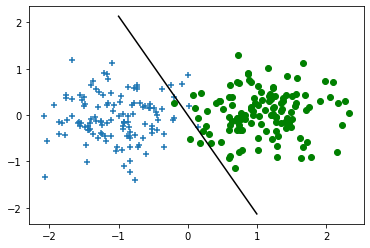

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(s1[:,0],s1[:,1], marker='+')
plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')

# Experiment n°2

In [ ]:
mu = [-1,0]
sig = [[0.75,0], [0,0.75]]
s1 = np.random.multivariate_normal(mu,sig,125)

mu = [1,0]
sig = [[0.75,0], [0,0.75]]
s2 = np.random.multivariate_normal(mu,sig,125)
s = np.concatenate((s1,s2),axis=0)

y = [-1] * 125 
y.extend([1] * 125)

s,y= shuffle(s,y)

s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)

In [ ]:
w = perceptron(s_train,y_train)

Convergence


In [ ]:
y_pred = np.inner(s_test,w) 
for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
accuracy_score(y_test,y_pred)

0.8

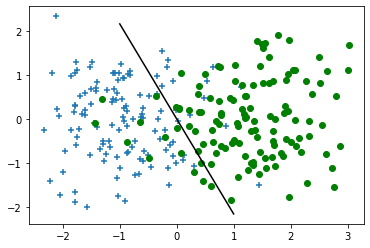

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(s1[:,0],s1[:,1], marker='+')
plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


a = -w[0][0] / w[0][1]
xx = np.linspace(-1, 1)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k-')

# Experiment n°3

In [ ]:
def generate_data(sig):
    mu = [-1,0]
    sig = [[sig,0], [0,sig]]
    s1 = np.random.multivariate_normal(mu,sig,125)

    mu = [1,0]
    sig = [[sig,0], [0,sig]]
    s2 = np.random.multivariate_normal(mu,sig,125)
    s = np.concatenate((s1,s2),axis=0)
    
    y = [-1] * 125 
    y.extend([1] * 125)

    s,y= shuffle(s,y)
    
    return s1,s2,s,y

In [ ]:
def get_accuracy(s_test,y_test,w):
    y_pred = np.inner(s_test,w) 
    for i,pred in enumerate(y_pred) :
        if pred > 0 :
            y_pred[i] = 1
        else :
            y_pred[i] = -1
    return accuracy_score(y_test,y_pred)

Convergence
Convergence
Convergence
[1.0, 1.0, 1.0]
Sigma = 0.01, Mean = 1.0
Sigma = 0.01, Variance = 0.0


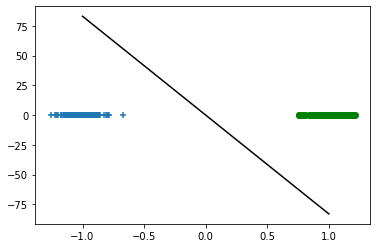

Convergence
Convergence
Convergence
[1.0, 1.0, 1.0]
Sigma = 0.1, Mean = 1.0
Sigma = 0.1, Variance = 0.0


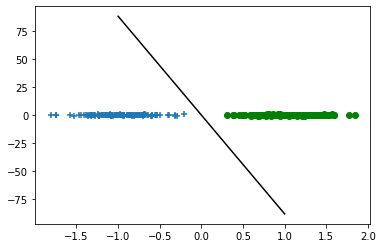

Convergence
Convergence
Convergence
[0.96, 0.94, 0.94]
Sigma = 0.5, Mean = 0.9466666666666667
Sigma = 0.5, Variance = 0.009428090415820642


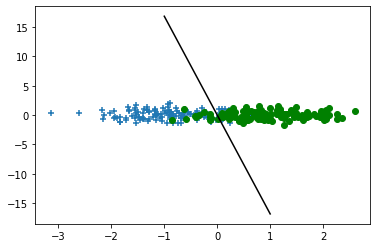

Convergence
Convergence
Convergence
[0.94, 0.82, 0.92]
Sigma = 0.7, Mean = 0.8933333333333332
Sigma = 0.7, Variance = 0.05249338582674542


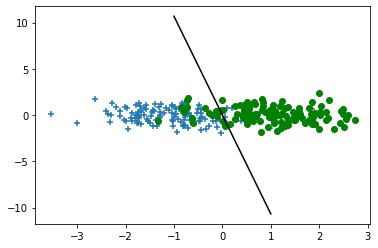

In [ ]:
sigs = [0.01,0.1,0.5,0.7]
for sig in sigs :
    accuracies = []
    for i in range(3) :
        s1,s2,s,y = generate_data(sig)
        s_train, s_test, y_train, y_test = train_test_split(s, y, test_size=0.2, random_state=42)
        w = perceptron(s_train,y_train)
        accuracies.append(get_accuracy(s_test,y_test,w))
    print(accuracies)
    print("Sig = {}, Mean = {}".format(sig,np.mean(accuracies)))
    print("Sig = {}, Variance = {}".format(sig,np.std(accuracies)))
    
    plt.scatter(s1[:,0],s1[:,1], marker='+')
    plt.scatter(s2[:,0],s2[:,1], c= 'green', marker='o')


    a = -w[0][0] / w[0][1]
    xx = np.linspace(-1, 1)
    yy = a * xx / w[0][1]

    plt.plot(xx, yy, 'k-')
    plt.show()